<a href="https://colab.research.google.com/github/alexpm8/Python-Stock-Prediction/blob/main/YT_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the libraries
import math 
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#get the stock quote
df = web.datareader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#show the data 
df

AttributeError: ignored

In [ ]:
pip uninstall pandas-datareader

Found existing installation: pandas-datareader 0.9.0
Uninstalling pandas-datareader-0.9.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/pandas_datareader-0.9.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pandas_datareader/*
Proceed (y/n)? y
  Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 8.1 MB/s 


In [ ]:
#import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get data stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#show data 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540045
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607437
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747406
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880664
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860234
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.426826
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,66.596100
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.501358


In [ ]:
#get the number of rows and columns 
df.shape

(2003, 6)

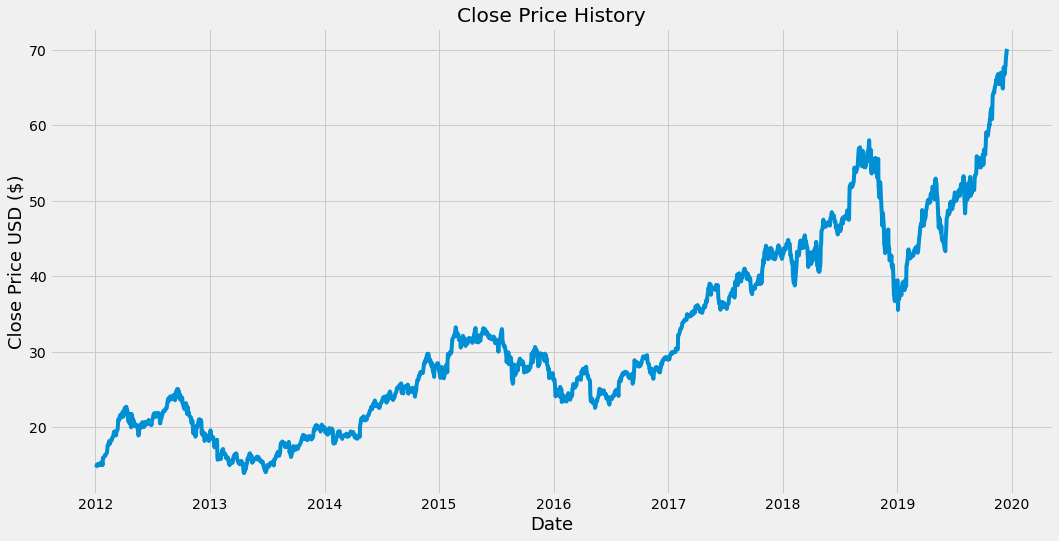

In [ ]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
#Create a new data frame with only the 'close columns
data=df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1603

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [ ]:
#create the training dataset
#create the scale training data set
train_data = scaled_data[0:training_data_len , :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01

In [ ]:
#convert the x_train and y_train to numpy arrays 
import numpy as np
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#reshape the data - a lstm expects the imput to be 3d
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1543, 60, 1)

In [ ]:
#Build the lstm model 
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#complie model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#train the model 
model.fit(x_train, y_train, batch_size=1, epochs=1)

1543/1543 [==============================] - 41s 24ms/step - loss: 6.9296e-04


In [ ]:
#Create the testing data set
#Create a new array containign scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#creat the data sets x_test and y_test 
x_test = [] 
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [ ]:
#get the models predicted price values 
#want predictions to contain the same values as our y_test data set 
#getting predictions based off of x_test data set
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#get the root mean squared error (RMSE)
#a value of zero for a mean squared error means that the model is perfect, exact values 
rmse = np.sqrt( np.mean( predictions - y_test ) **2 )
rmse

2.6600248622894287

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


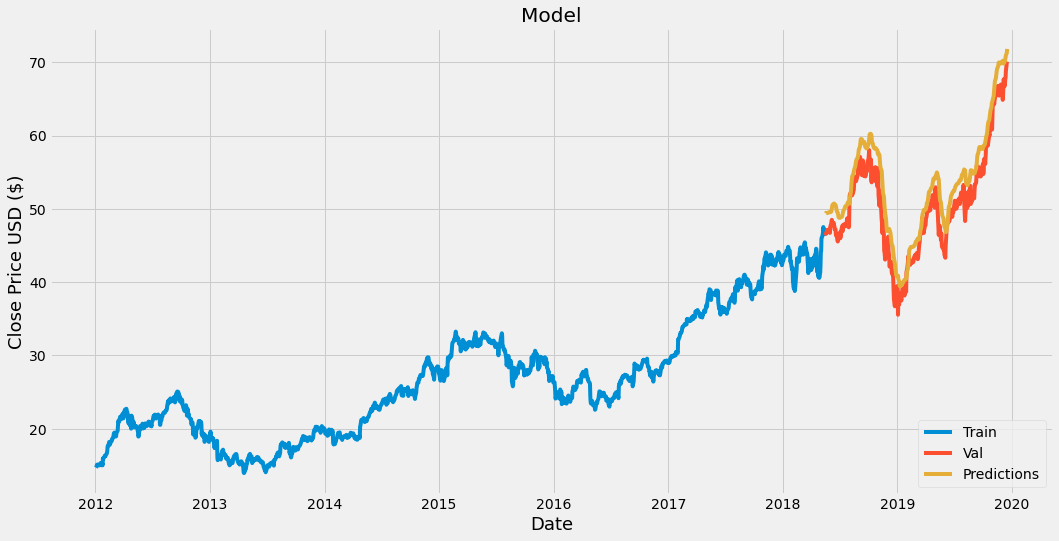

In [ ]:
#plot the data 
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions 
#Visualize the data 
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,49.390759
2018-05-18,46.577499,49.444561
2018-05-21,46.907501,49.428078
2018-05-22,46.790001,49.426373
2018-05-23,47.090000,49.414715
...,...,...
2019-12-11,67.692497,70.403381
2019-12-12,67.864998,70.654114
2019-12-13,68.787498,70.920456


In [ ]:
#predict closing price dec 18, 2019 
#get the quote 
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#Create a new dataFrame
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the df to an array
last_60_days = new_df[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list 
X_test = []
#append the last 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test dataset to numpy array
X_test = np.array(X_test)
#reshape the data 
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#get predicted scale price
pred_price = model.predict(X_test)
#undo scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[72.35058]]


In [ ]:
#Get quote 
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-18    69.934998
Name: Close, dtype: float64
